# Credit Scoring and Segmentation

Credit scoring aims to determine the creditworthiness of individuals based on their credit profiles. By analyzing factors such as payment history, credit utilization ratio, and number of credit accounts, we can assign a credit score to each individual, providing a quantitative measure of their creditworthiness.

The process of calculating credit scores and segmenting customers based on their credit scores involves several steps. Firstly, relevant data about borrowers is collected and organized. Then, using complex algorithms and statistical models, the collected data is analyzed to generate credit scores for each borrower.

Once the credit scores are calculated, customers are segmented into different risk categories or credit tiers based on predefined thresholds.
This segmentation helps financial institutions assess the credit risk associated with each customer and make informed decisions regarding loan approvals, interest rates, and credit limits. By categorizing customers into segments, financial institutions can better manage their lending portfolios and effectively mitigate the risk of potential defaults.

In [17]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
# pio.renderers.default = "notebook_connected"
pio.templates.default = "plotly_white"

## Dataset
The given dataset includes features such as age, gender, marital status, education level, employment status, credit utilization ratio, payment history, number of credit accounts, loan amount, interest rate, loan term, type of loan, and income level.



Below is the description of all the features in the data:

1. Age: This feature represents the age of the individual.
2. Gender: This feature captures the gender of the individual.
3. Marital Status: This feature denotes the marital status of the individual.
4. Education Level: This feature represents the highest level of education attained by the individual.
5. Employment Status: This feature indicates the current employment status of the individual.
6. Credit Utilization Ratio: This feature reflects the ratio of credit used by the individual compared to their total available credit limit.
7. Payment History: It represents the monthly net payment behaviour of each customer, taking into account factors such as on-time payments, late payments, missed payments, and defaults.
8. Number of Credit Accounts: It represents the count of active credit accounts the person holds.
9. Loan Amount: It indicates the monetary value of the loan.
10. Interest Rate: This feature represents the interest rate associated with the loan.
11. Loan Term: This feature denotes the duration or term of the loan.
12. Type of Loan: It includes categories like “Personal Loan,” “Auto Loan,” or potentially other types of loans.

In [2]:
data = pd.read_csv("data/credit_scoring.csv")
data.head()

,Age,Gender,Marital Status,Education Level,Employment Status,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term,Type of Loan
0,60,Male,Married,Master,Employed,0.22,2685.0,2,4675000,2.65,48,Personal Loan
1,25,Male,Married,High School,Unemployed,0.20,2371.0,9,3619000,5.19,60,Auto Loan
2,30,Female,Single,Master,Employed,0.22,2771.0,6,957000,2.76,12,Auto Loan
3,58,Female,Married,PhD,Unemployed,0.12,1371.0,2,4731000,6.57,60,Auto Loan
4,32,Male,Married,Bachelor,Self-Employed,0.99,828.0,2,3289000,6.28,36,Personal Loan


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        1000 non-null   int64  
 1   Gender                     1000 non-null   object 
 2   Marital Status             1000 non-null   object 
 3   Education Level            1000 non-null   object 
 4   Employment Status          1000 non-null   object 
 5   Credit Utilization Ratio   1000 non-null   float64
 6   Payment History            1000 non-null   float64
 7   Number of Credit Accounts  1000 non-null   int64  
 8   Loan Amount                1000 non-null   int64  
 9   Interest Rate              1000 non-null   float64
 10  Loan Term                  1000 non-null   int64  
 11  Type of Loan               1000 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [7]:
data.describe()

,Age,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,42.702000,0.509950,1452.814000,5.580000,2.471401e+06,10.686600,37.128000
std,13.266771,0.291057,827.934146,2.933634,1.387047e+06,5.479058,17.436274
min,20.000000,0.000000,0.000000,1.000000,1.080000e+05,1.010000,12.000000
25%,31.000000,0.250000,763.750000,3.000000,1.298000e+06,6.022500,24.000000
50%,42.000000,0.530000,1428.000000,6.000000,2.437500e+06,10.705000,36.000000
75%,54.000000,0.750000,2142.000000,8.000000,3.653250e+06,15.440000,48.000000
max,65.000000,1.000000,2857.000000,10.000000,4.996000e+06,19.990000,60.000000


In [18]:
# distribution of the credit utilization ratio:
credit_utilization_fig = px.box(data, y='Credit Utilization Ratio',
                                title='Credit Utilization Ratio Distribution')
credit_utilization_fig.show()

![Credit Utilization Ratio Distribution.png](<attachment:Credit Utilization Ratio Distribution.png>)
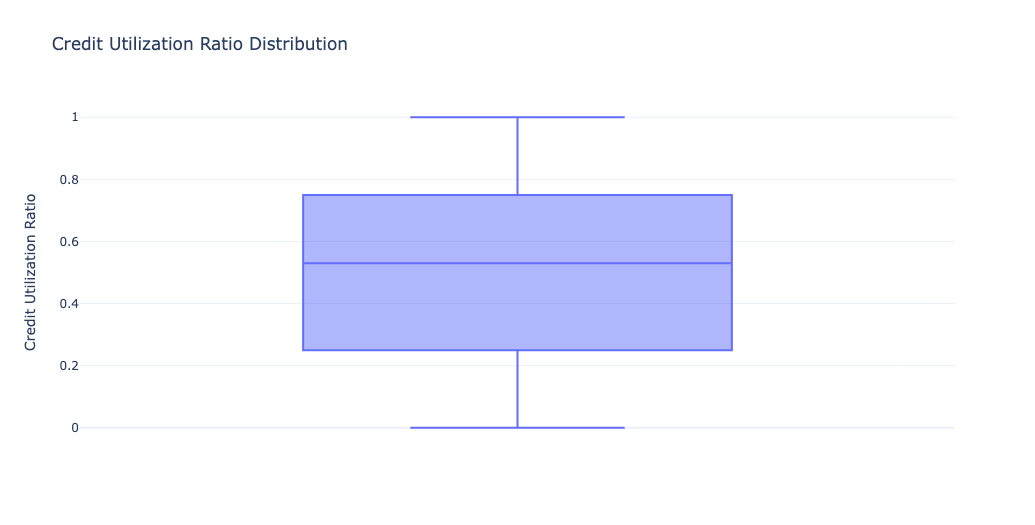

In [9]:
# distribution of the loan amount
loan_amount_fig = px.histogram(data, x='Loan Amount', 
                               nbins=20, 
                               title='Loan Amount Distribution')
loan_amount_fig.show()

![Loan Amount Distribution.png](<attachment:Loan Amount Distribution.png>)
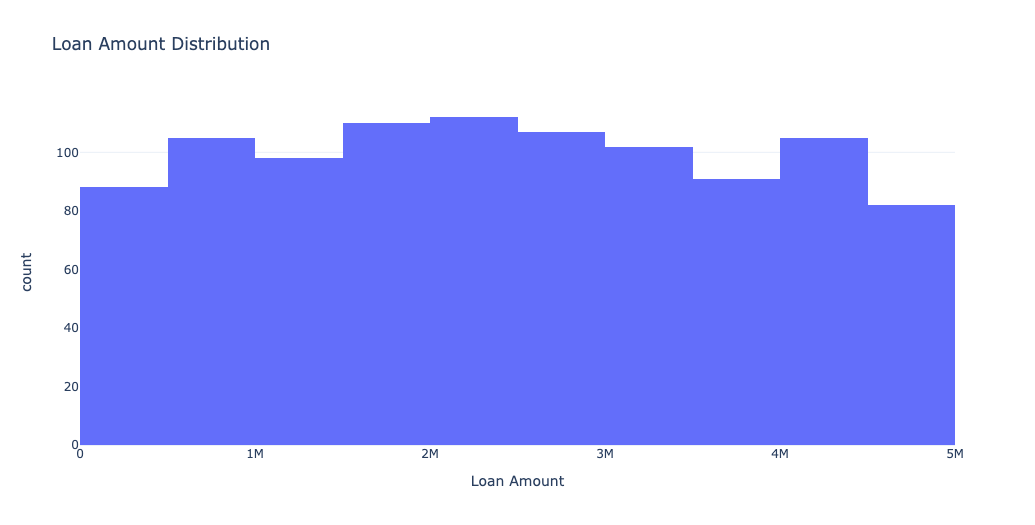

In [10]:
# corr Matrix 
numeric_df = data[['Credit Utilization Ratio', 
                   'Payment History', 
                   'Number of Credit Accounts', 
                   'Loan Amount', 'Interest Rate', 
                   'Loan Term']]
correlation_fig = px.imshow(numeric_df.corr(), 
                            title='Correlation Heatmap')
correlation_fig.show()

![Correlation Heatmap.png](<attachment:Correlation Heatmap.png>)
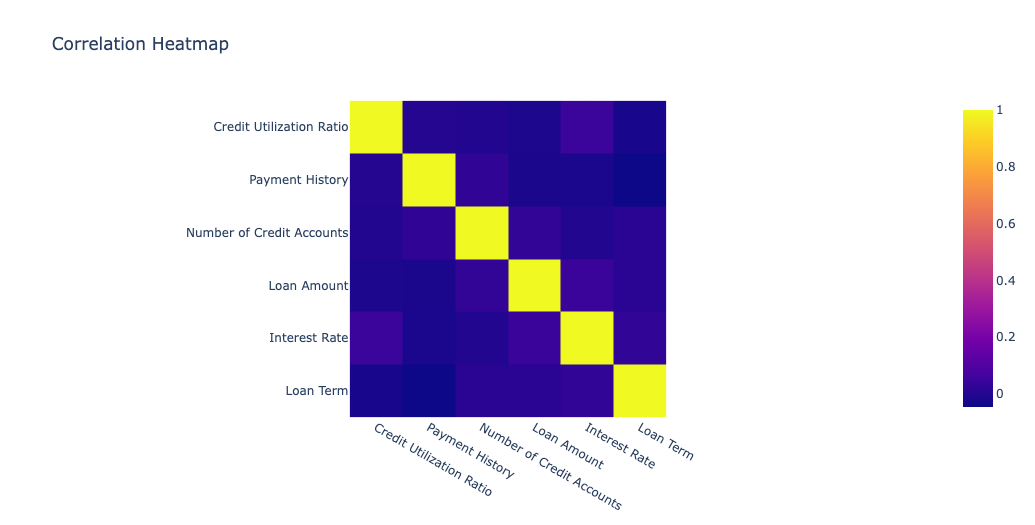

## Calculating Credit Scores

To calculate the credit scores, we need to use an appropriate technique. There are several widely used techniques for calculating credit scores, each with its own calculation process. One example is the FICO score, a commonly used credit scoring model in the industry.

FICO scores are based on five categories. The chart below shows the relative importance of each category.

![Fico factors](data/Fico_factors.png)


In [11]:
# Define the mapping for categorical features
education_level_mapping = {'High School': 1, 'Bachelor': 2, 'Master': 3, 'PhD': 4}
employment_status_mapping = {'Unemployed': 0, 'Employed': 1, 'Self-Employed': 2}

# Apply mapping to categorical features
data['Education Level'] = data['Education Level'].map(education_level_mapping)
data['Employment Status'] = data['Employment Status'].map(employment_status_mapping)

In [12]:
# Function to calculate the credit score based on the FICO-like formula
def calculate_credit_score(payment_history, credit_utilization, num_credit_accounts, education_level, employment_status):
    score = (payment_history * 0.35) + (credit_utilization * 0.30) + (num_credit_accounts * 0.15) + (education_level * 0.10) + (employment_status * 0.10)
    return score

# Calculate credit scores using the complete FICO formula
credit_scores = []

for index, row in data.iterrows():
    payment_history = row['Payment History']
    credit_utilization_ratio = row['Credit Utilization Ratio']
    number_of_credit_accounts = row['Number of Credit Accounts']
    education_level = row['Education Level']
    employment_status = row['Employment Status']

    # Apply the FICO formula to calculate the credit score
    # Calculate credit score
    credit_score = calculate_credit_score(payment_history, credit_utilization_ratio, number_of_credit_accounts, education_level, employment_status)
    credit_scores.append(credit_score)

# Add the credit scores as a new column to the DataFrame
data['Credit Score'] = credit_scores

data.head()

,Age,Gender,Marital Status,Education Level,Employment Status,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term,Type of Loan,Credit Score
0,60,Male,Married,3,1,0.22,2685.0,2,4675000,2.65,48,Personal Loan,940.516
1,25,Male,Married,1,0,0.20,2371.0,9,3619000,5.19,60,Auto Loan,831.360
2,30,Female,Single,3,1,0.22,2771.0,6,957000,2.76,12,Auto Loan,971.216
3,58,Female,Married,4,0,0.12,1371.0,2,4731000,6.57,60,Auto Loan,480.586
4,32,Male,Married,2,2,0.99,828.0,2,3289000,6.28,36,Personal Loan,290.797


## Costumers Segmentation Based on Credit Scores

let’s use the KMeans clustering algorithm to segment customers based on their credit scores:

In [13]:
from sklearn.cluster import KMeans

X = data[['Credit Score']]
kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)
kmeans.fit(X)


KMeans(n_clusters=4, n_init=10, random_state=42)

In [14]:
data['Segment'] = kmeans.labels_
data['Segment']

0      3
1      3
2      3
3      0
4      0
      ..
995    0
996    1
997    3
998    0
999    0
Name: Segment, Length: 1000, dtype: int32

In [15]:
# Convert the 'Segment' column to category data type
data['Segment'] = data['Segment'].astype('category')

# Visualize the segments using Plotly
fig = px.scatter(data, x=data.index, y='Credit Score', color='Segment',
                 color_discrete_sequence=['green', 'blue', 'yellow', 'red'])
fig.update_layout(
    xaxis_title='Customer Index',
    yaxis_title='Credit Score',
    title='Customer Segmentation based on Credit Scores'
)
fig.show()

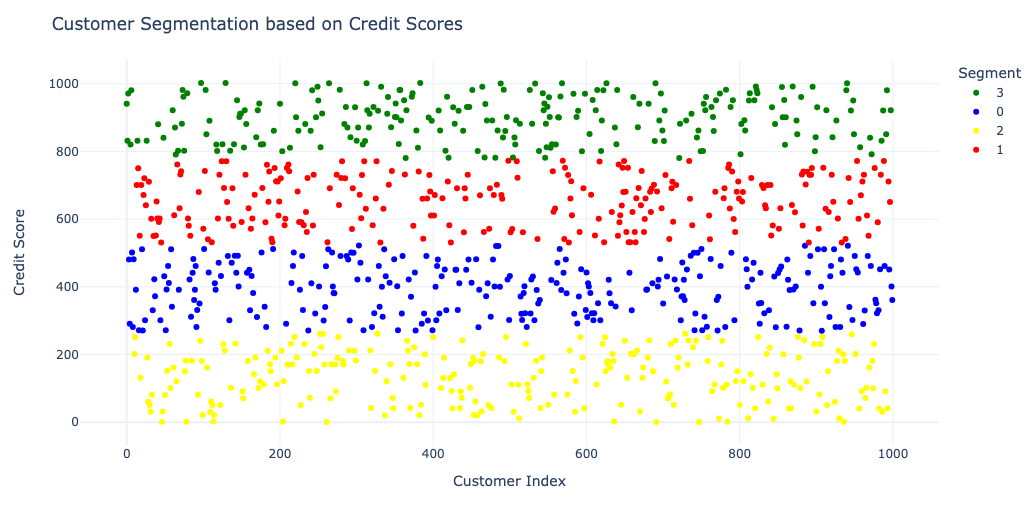

### let’s name the segments based on the above clusters and have a look at the segments again:

In [16]:
data['Segment'] = data['Segment'].map({2: 'Very Low', 
                                       0: 'Low',
                                       1: 'Good',
                                       3: "Excellent"})

# Convert the 'Segment' column to category data type
data['Segment'] = data['Segment'].astype('category')

# Visualize the segments using Plotly
fig = px.scatter(data, x=data.index, y='Credit Score', color='Segment',
                 color_discrete_sequence=['green', 'blue', 'yellow', 'red'])
fig.update_layout(
    xaxis_title='Customer Index',
    yaxis_title='Credit Score',
    title='Customer Segmentation based on Credit Scores'
)
fig.show()

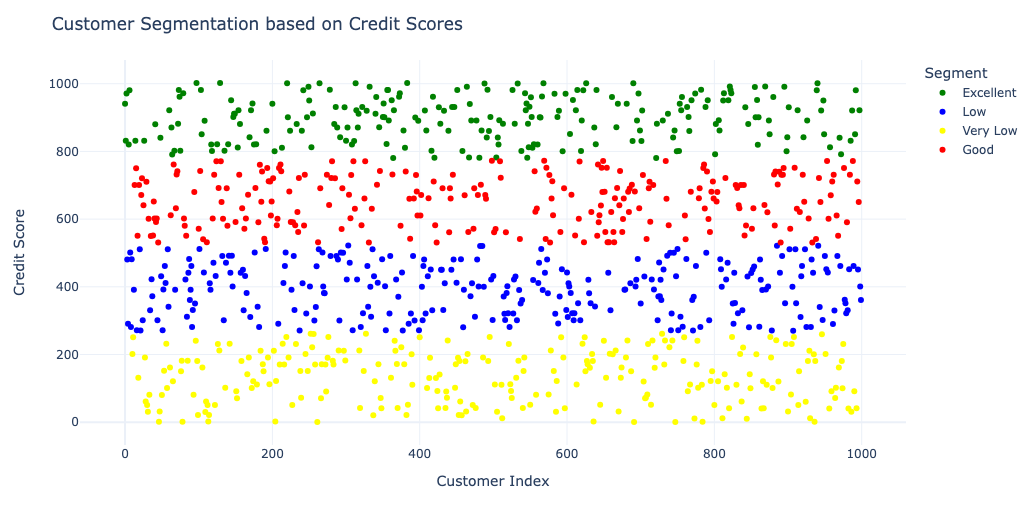